## Exploratory Data Analysis

Data sources
- load.csv
- payment.csv
- clarity_underwriting_variables.csv

### Import Packages

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../')))

In [2]:
from src.utils.data_extractor import DataExtractor
from src.utils.eda_analyzer import EDAAnalyzer
from src.utils.data_preprocessor import DataPreprocessor

### Load the loan dataset

In [3]:
loan_filepath = "../data/loan.csv"
loan_df = DataExtractor.extract_csv(file_path=loan_filepath)

2024-09-17 07:38:10,482 - INFO - Extracted data from CSV file: ../data/loan.csv


In [4]:
loan_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


### Instantiate EDA Class

In [5]:
eda = EDAAnalyzer(loan_df)
pre_processor = DataPreprocessor(loan_df)

#### Data Summary

In [6]:
eda.summarize_data()

2024-09-17 07:38:10,686 - INFO - Generating summary statistics...



--- Dataset Overview ---
Rows: 577682, Columns: 19

--- Data Types ---
loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

--- Numeric Features Summary ---
                                     count  

In [7]:
eda.df[["originatedDate", "applicationDate"]].head()

,originatedDate,applicationDate
0,NaN,2016-02-23T17:29:01.940000
1,2016-01-20T15:49:18.846000,2016-01-19T22:07:36.778000
2,NaN,2016-08-01T13:51:14.709000
3,NaN,2015-08-06T23:58:08.880000
4,NaN,2016-06-05T22:31:34.304000


#### Fix the datatypes of the columns for date type

In [8]:
pre_processor.change_data_type(columns=["originatedDate", "applicationDate"], dtype="datetime")
print(pre_processor.get_preprocessed_data()[["originatedDate", "applicationDate"]].head())

2024-09-17 07:38:13,082 - INFO - Converted column originatedDate to datetime.
2024-09-17 07:38:13,291 - INFO - Converted column applicationDate to datetime.


           originatedDate         applicationDate
0                     NaT 2016-02-23 17:29:01.940
1 2016-01-20 15:49:18.846 2016-01-19 22:07:36.778
2                     NaT 2016-08-01 13:51:14.709
3                     NaT 2015-08-06 23:58:08.880
4                     NaT 2016-06-05 22:31:34.304


In [9]:
eda = EDAAnalyzer(pre_processor.get_preprocessed_data())
eda.summarize_data()

2024-09-17 07:38:13,553 - INFO - Generating summary statistics...



--- Dataset Overview ---
Rows: 577682, Columns: 19

--- Data Types ---
loanId                                      object
anon_ssn                                    object
payFrequency                                object
apr                                        float64
applicationDate                     datetime64[ns]
originated                                    bool
originatedDate                      datetime64[ns]
nPaidOff                                   float64
approved                                      bool
isFunded                                     int64
loanStatus                                  object
loanAmount                                 float64
originallyScheduledPaymentAmount           float64
state                                       object
leadType                                    object
leadCost                                     int64
fpStatus                                    object
clarityFraudId                              object
hasCF     

#### Missing Value Analysis

2024-09-17 07:38:15,236 - INFO - Analyzing missing values...



--- Missing Values Analysis ---
                 Missing Values  Percentage
originatedDate           531690   92.038526
fpStatus                 525959   91.046458
clarityFraudId           219989   38.081332
apr                        3922    0.678920
loanAmount                 2250    0.389488
payFrequency               1273    0.220363
applicationDate             581    0.100574
loanStatus                  391    0.067684
loanId                      256    0.044315
state                       132    0.022850
nPaidOff                     24    0.004155


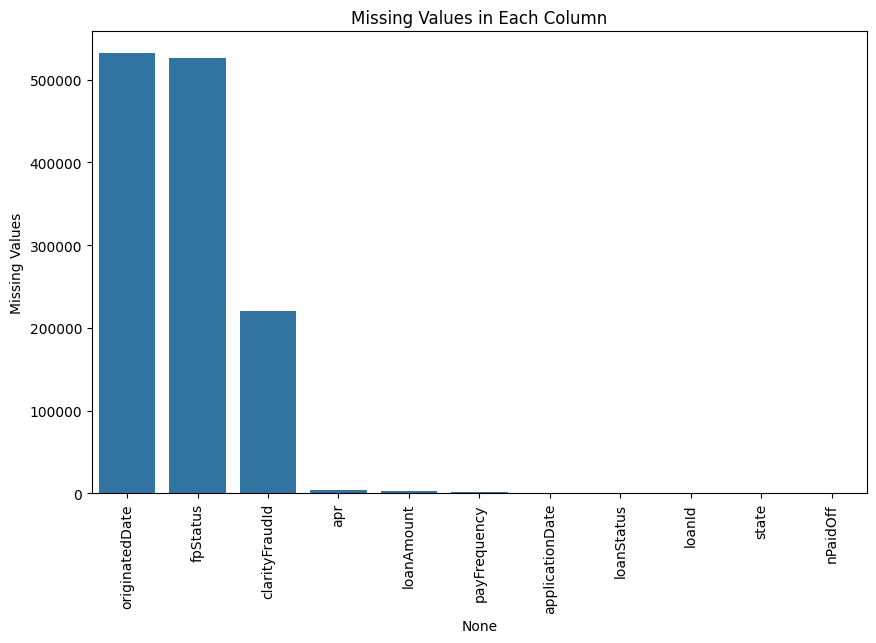

In [10]:
eda.missing_values_analysis()

In [11]:
import numpy as np
pre_processor.replace_values([
    {
        'column': 'fpStatus',
        'from': np.nan,
        'to': 'NoAchAttempt'
    },
    {
        'column': 'nPaidOff',
        'from': np.nan,
        'to': 0
    }
    
    ])

pre_processor.drop_rows_with_nulls_in_columns(columns=['loanId', 'apr', 'loanAmount', 'payFrequency', 'loanStatus'])
pre_processor.handle_missing_values(strategy='most_frequent', columns=['state'])

2024-09-17 07:38:15,771 - INFO - Replaced nan with NoAchAttempt in column: fpStatus


2024-09-17 07:38:15,778 - INFO - Replaced nan with 0 in column: nPaidOff
2024-09-17 07:38:16,019 - INFO - Dropped rows with null values in column loanId. Before: (577682, 19), After: (577426, 19)
2024-09-17 07:38:16,154 - INFO - Dropped rows with null values in column apr. Before: (577426, 19), After: (573760, 19)
2024-09-17 07:38:16,269 - INFO - Dropped rows with null values in column loanAmount. Before: (573760, 19), After: (573731, 19)
2024-09-17 07:38:16,404 - INFO - Dropped rows with null values in column payFrequency. Before: (573731, 19), After: (572512, 19)
2024-09-17 07:38:16,535 - INFO - Dropped rows with null values in column loanStatus. Before: (572512, 19), After: (572377, 19)
2024-09-17 07:38:16,535 - INFO - Final shape after dropping rows with null values in columns: ['loanId', 'apr', 'loanAmount', 'payFrequency', 'loanStatus']. Initial shape: (577682, 19), Final shape: (572377, 19)
2024-09-17 07:38:16,629 - INFO - Handled missing values for column: state using strategy:

In [12]:
loan_df[loan_df["payFrequency"].isna()][['loanStatus']].value_counts(dropna=False)

loanStatus           
Withdrawn Application    1141
Rejected                  128
NaN                         3
Settled Bankruptcy          1
Name: count, dtype: int64

In [13]:
loan_df[loan_df["loanAmount"].isna()][['loanStatus']].value_counts(dropna=False)

loanStatus           
Withdrawn Application    1931
NaN                       256
Rejected                   63
Name: count, dtype: int64

In [14]:
loan_df[loan_df["apr"].isna()][['loanStatus']].value_counts(dropna=False)

loanStatus           
Withdrawn Application    3580
NaN                       256
Rejected                   86
Name: count, dtype: int64

In [15]:
loan_df[loan_df["loanStatus"].isna()][['approved']].value_counts(dropna=False)

approved
False       391
Name: count, dtype: int64

2024-09-17 07:38:17,138 - INFO - Analyzing missing values...



--- Missing Values Analysis ---
                 Missing Values  Percentage
originatedDate           526388   91.965261
clarityFraudId           217343   37.972001
applicationDate             574    0.100284


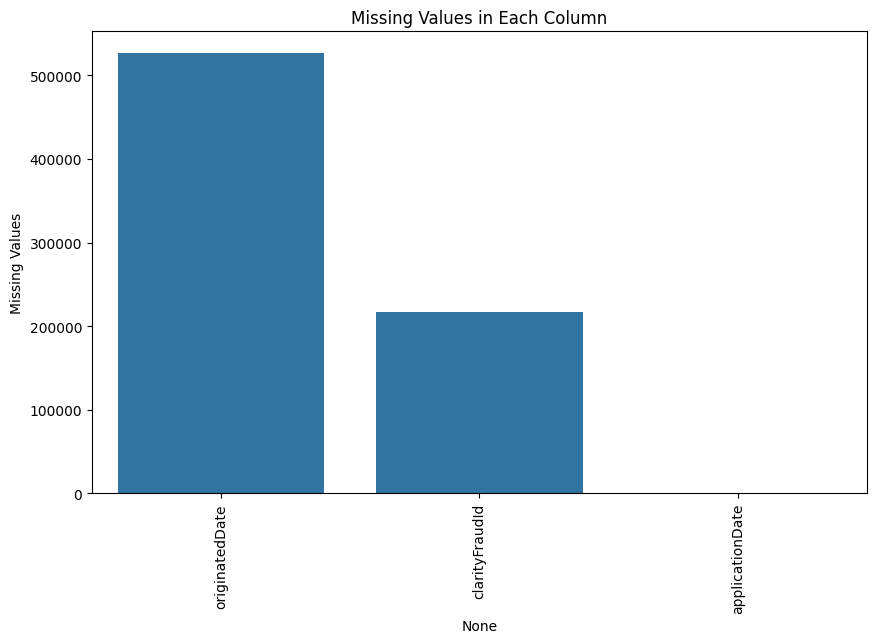

In [16]:
eda = EDAAnalyzer(pre_processor.get_preprocessed_data())
eda.missing_values_analysis()

#### Correlation Matrix

2024-09-17 07:38:17,580 - INFO - Generating correlation matrix...


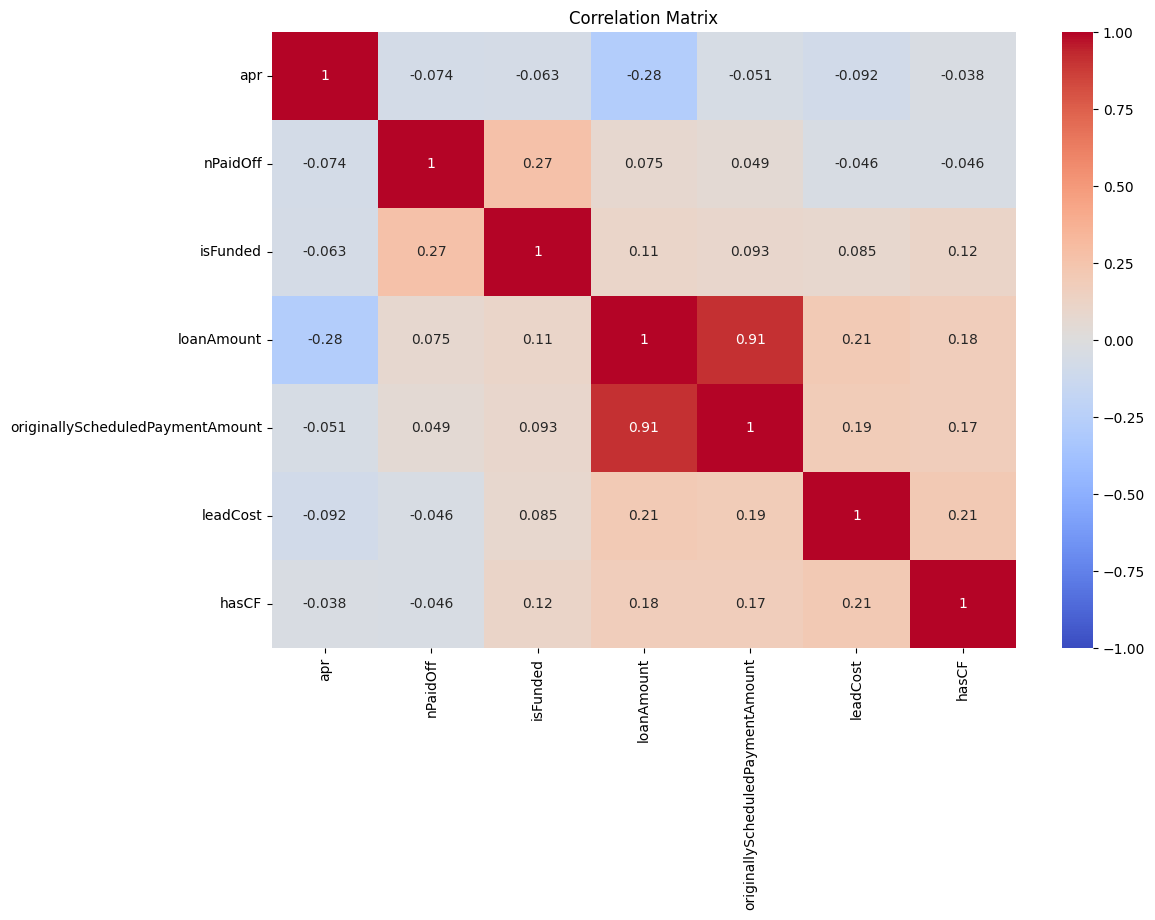

In [17]:
eda.correlation_matrix()

2024-09-17 07:38:18,179 - INFO - Generating correlation matrix for all features...
2024-09-17 07:38:20,535 - INFO - Encoded column: loanId
2024-09-17 07:38:22,391 - INFO - Encoded column: anon_ssn
2024-09-17 07:38:22,515 - INFO - Encoded column: payFrequency
2024-09-17 07:38:22,640 - INFO - Encoded column: loanStatus
2024-09-17 07:38:22,777 - INFO - Encoded column: state
2024-09-17 07:38:22,905 - INFO - Encoded column: leadType
2024-09-17 07:38:23,023 - INFO - Encoded column: fpStatus
2024-09-17 07:38:24,184 - INFO - Encoded column: clarityFraudId


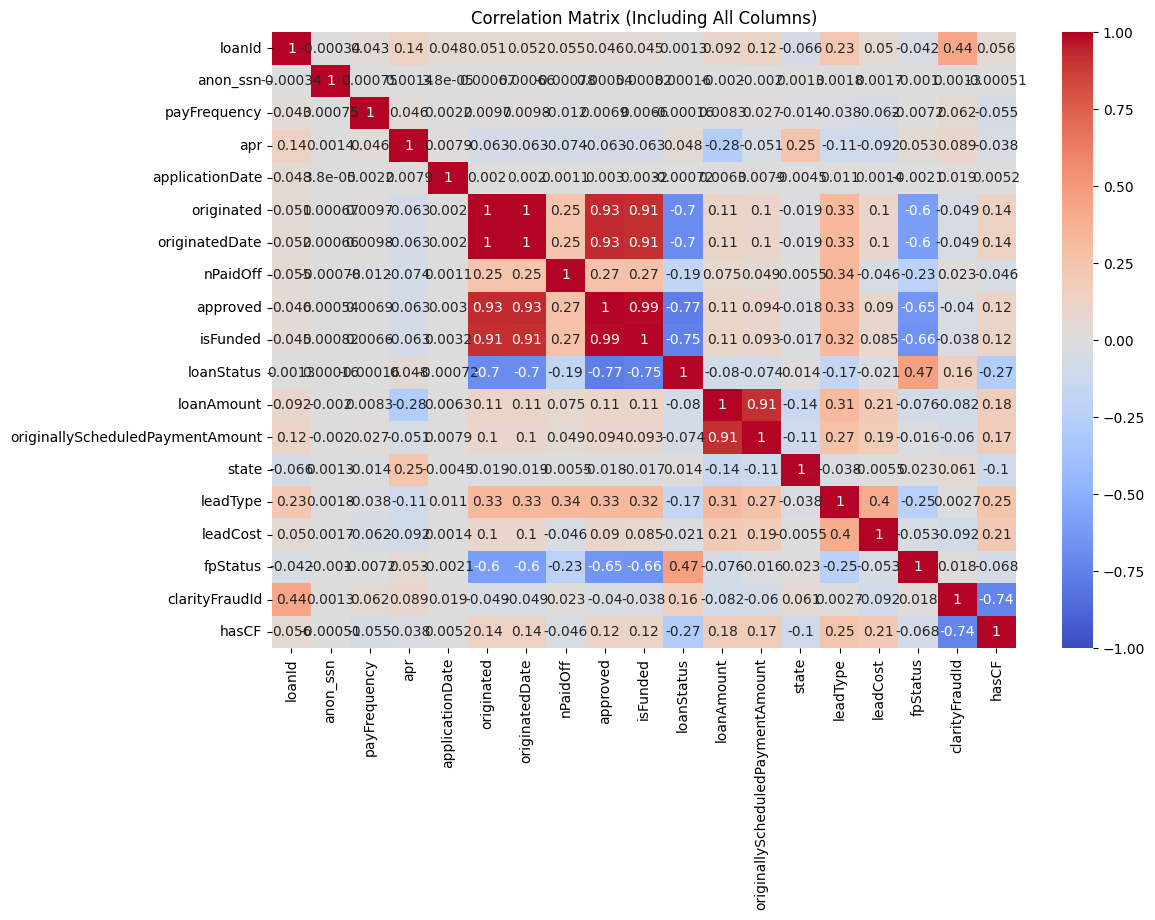

In [18]:
eda.correlation_matrix_all_columns()

#### Outlier Detection

In [28]:
eda.df[["leadCost"]].value_counts()

leadCost
3           268253
6           169883
10           51532
25           27540
0            27176
40           20078
75            2825
60            2216
100           1528
170            323
200            319
120            236
115            173
11             150
45             145
Name: count, dtype: int64

2024-09-17 07:45:38,280 - INFO - Detecting outliers...



--- Outlier Detection Summary ---
apr: 7829 outliers detected
nPaidOff: 4391 outliers detected
isFunded: 38982 outliers detected
loanAmount: 11071 outliers detected
originallyScheduledPaymentAmount: 9249 outliers detected
leadCost: 7620 outliers detected
hasCF: 0 outliers detected


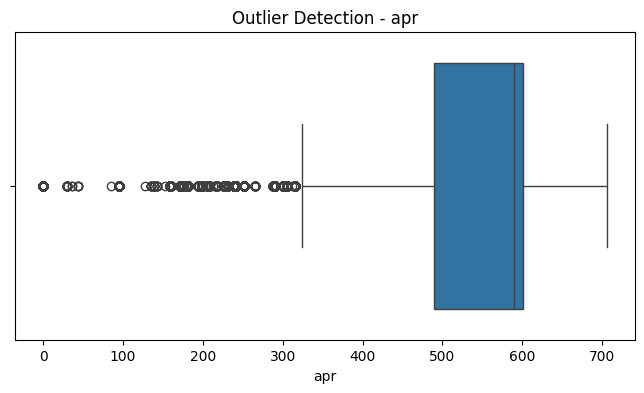

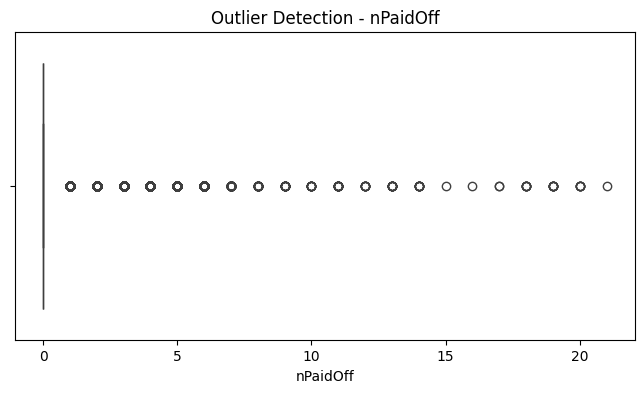

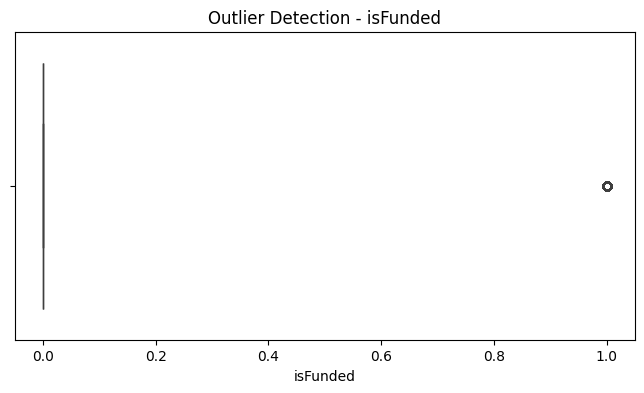

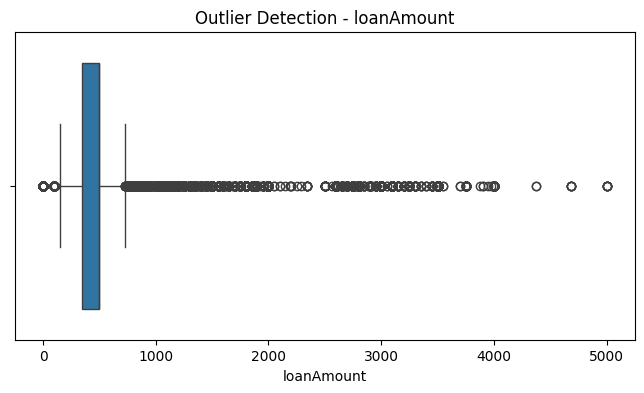

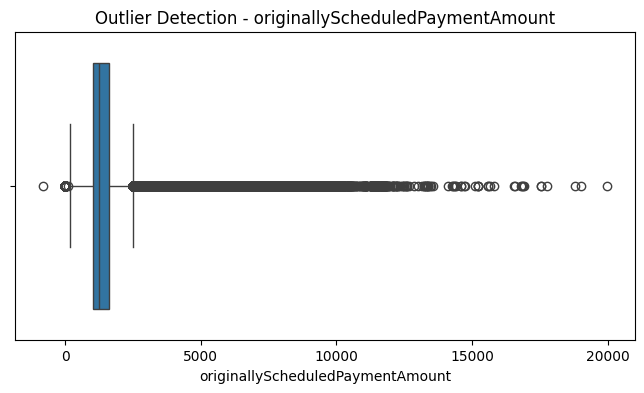

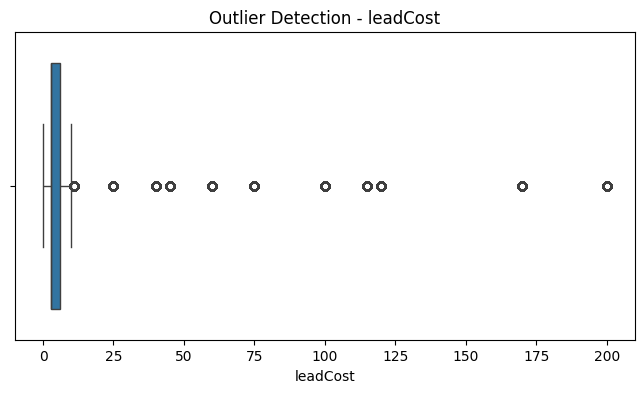

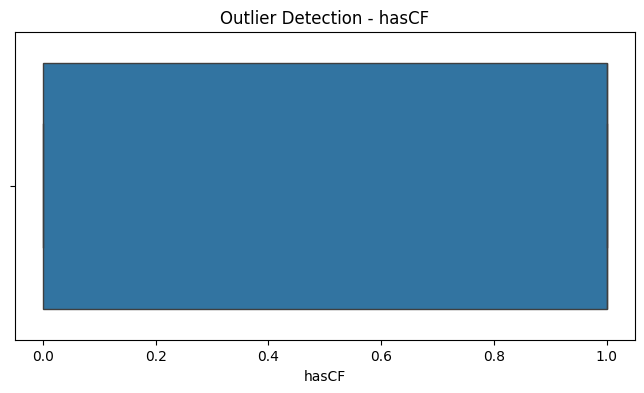

In [25]:
eda.outlier_detection(method="zscore")

#### Handle outliers

In [ ]:
pre_processor.handle

#### Distribution Plots

2024-09-17 07:38:35,171 - INFO - Generating distribution plots...


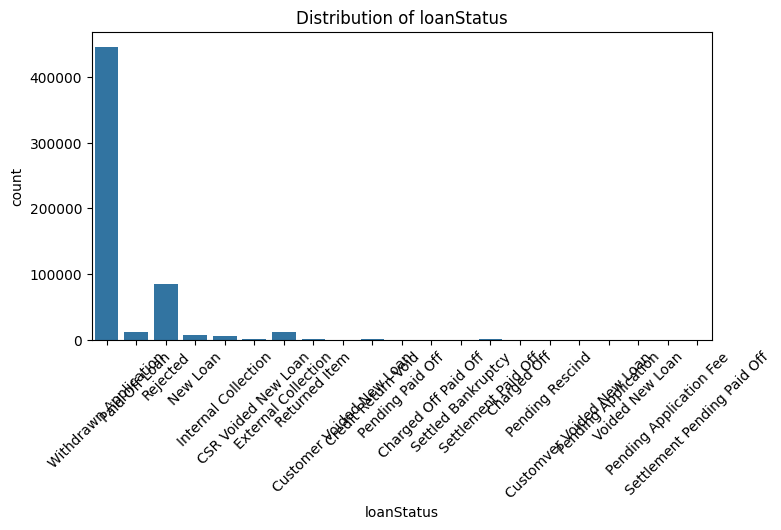

In [20]:
eda.distribution_plots(columns=['loanStatus'])

In [21]:
eda.df[["loanStatus"]].value_counts(dropna=False)

loanStatus                 
Withdrawn Application          446282
Rejected                        84859
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                325
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Rescind                     4
Pending Application                 4
Voided New Loan                     2
Customver Voided New Loan           1
Charged Off                         1
Settlement Pending Paid Off         1
Name: count, dtype: int64

In [22]:
loan_df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

2024-09-17 07:38:36,908 - INFO - Analyzing relationship of features with target: loanStatus


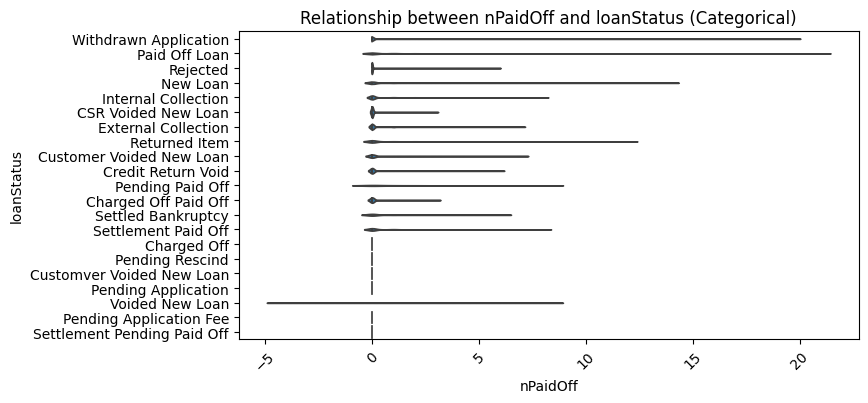

In [23]:
eda.target_analysis(target_column='loanStatus', numeric_columns=[], categorical_columns=['nPaidOff'])